## Assignment-3: K-means Clustering
 
You need to complete the code in model.py and then run this notebook.

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler as SS
from model import *
import pickle

In [2]:
df=pd.read_csv("./Mall_Customers.csv",index_col=0)

#### Data Description

This data is from a supermarket mall, collected through membership cards. You have some basic information about the customers like Customer ID, age, gender, annual income and spending score. Spending Score is something assigned to the customer based on certain defined parameters like customer behavior and purchasing data.

Your task is to find patterns in the data through clustering.

In [3]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [4]:
df.describe()

,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


#### Scatter plots

Analysing the scatter plot can help you decide the number of clusters.

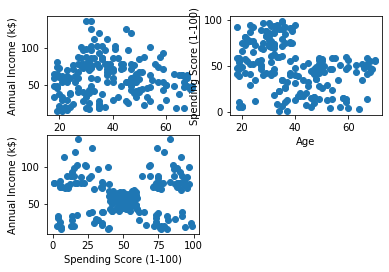

In [5]:
plt.subplot(2,2,1)
plt.scatter(df['Age'], df['Annual Income (k$)'])
plt.xlabel('Age')
plt.ylabel('Annual Income (k$)')
plt.subplot(2,2,2)
plt.scatter(df['Age'], df['Spending Score (1-100)'])
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')
plt.subplot(2,2,3)
plt.scatter(df['Spending Score (1-100)'], df['Annual Income (k$)'])
plt.xlabel('Spending Score (1-100)')
plt.ylabel('Annual Income (k$)')
plt.show()

In [6]:
df['Gender'] = df['Gender'].astype('category') #encoding the categorical feature.
df['Gender'] = df['Gender'].cat.codes

In [7]:
X = df.values #preparing the dataset
scaler = SS()
scaler.fit(X)
X = scaler.transform(X) #standardizing the data

### Implement model.py file before running further

In [8]:
kmeans = Kmeans()

K = 11             #Define a suitable 'k' for the algorithm
n_iterations =  10 #Define suitable no. of epochs for the algorithm


In [9]:
kmeans.cluster(X, K, n_iterations = n_iterations)
labels = kmeans.labels

Distortion after  1  iterations is  250.85289676040034
Distortion after  2  iterations is  186.41086440736873
Distortion after  3  iterations is  178.7546589511921
Distortion after  4  iterations is  172.6789413929763
Distortion after  5  iterations is  165.19910735678306
Distortion after  6  iterations is  154.23691976300677
Distortion after  7  iterations is  148.2267655658022
Distortion after  8  iterations is  148.2267655658022
Distortion after  9  iterations is  148.2267655658022
Distortion after  10  iterations is  148.2267655658022


In [10]:
import pickle
with open('submission.pickle','wb') as pic:
    pickle.dump(labels,pic)

#### Distortion vs #ofClusters

The code that proceeds is for plotting the distortion vs #_of_clusters to obtain the elbow like curve. As taught in the class, this curve helps us decide the optimal 'k' for "better" clustering.

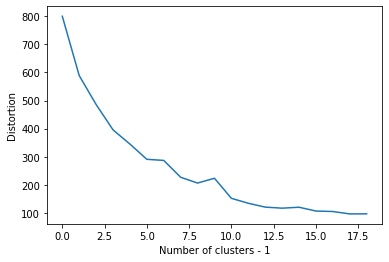

In [11]:
Distortion = []
for n_of_clusters in range(1,20):
    kmeans.cluster(X, n_of_clusters, verbose = False)
    Distortion.append(kmeans.distortion)
plt.plot(Distortion)
plt.ylabel("Distortion")
plt.xlabel("Number of clusters - 1")
plt.show()